In [41]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
import glob
import pylab as plot
import seaborn as sns
import matplotlib.ticker as ticker

In [9]:
params = {'legend.fontsize': "x-large",
         'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plot.rcParams.update(params)

Number of Dollar-tradable pairs

In [4]:
len([ x for x in glob.glob("../data/original/*.csv") if "usd" in x ])

155

In [2]:
TOP_10_CAPITALIZATION = ['btcusd', 'ethusd', 'eosusd', 'ltcusd', 'xrpusd', 'babusd', 'xmrusd', 'neousd', 'iotusd', "dshusd"]
timestamp2datetime = lambda x: datetime.fromtimestamp(int(x) / 1000.0)

In [ ]:
# try out with btc
btc_df = pd.read_csv(
        f"data/original/btcusd.csv",
        sep=',',
        parse_dates=['time'],
        index_col='time',
        date_parser=timestamp2datetime
    )
btc_df["middle"] = (btc_df["open"] + btc_df["close"]) / 2

In [ ]:
btc_1min_df = (
    btc_df
    .groupby(pd.Grouper(freq="1min"))
    .agg(
        open=("open", "first"),
        close=("close", "last"),
        high=("high", np.max),
        low=("low", np.min),
        volume=("volume", np.sum),
        middle_mean=("middle", np.mean),
        middle_median=("middle", np.median),
    )
    .fillna(method='ffill')
)

In [ ]:
btc_1min_df = btc_1min_df.fillna(method='ffill')

In [ ]:
print("Total Bins:", btc_1min_df.shape[0])
print("Bins without Trading:", btc_1min_df[ btc_1min_df["volume"] == 0 ].shape[0])
btc_1min_df.head()

In [ ]:
daily_missing_bins_df.head()

# Create minute-binned data

In [ ]:
top10_1min_df = pd.DataFrame()
for pair in TOP_10_CAPITALIZATION:
    print(pair)
    # load pair data
    min1_df = pd.read_csv(
        f"data/original/{pair}.csv",
        sep=',',
        parse_dates=['time'],
        index_col='time',
        date_parser=timestamp2datetime
    )
    # middle price
    min1_df["middle"] = (min1_df["open"] + min1_df["close"]) / 2
    # aggregate to remove duplicates
    min1_df = (
        min1_df
        .groupby(pd.Grouper(freq="1min"))
        .agg(
            open=("open", "first"),
            close=("close", "last"),
            high=("high", np.max),
            low=("low", np.min),
            volume=("volume", np.sum),
            middle_median=("middle", np.median),
        )
        .fillna(method='ffill')
    )
    min1_df["pair"] = pair
    # add dataframe to 
    top10_1min_df = pd.concat( [top10_1min_df, min1_df] ) 

In [ ]:
top10_1min_df

In [ ]:
# top10_1min_df.to_csv(
#     "data/1min/top10_merged.csv.gz",
#     sep=",",
#     chunksize=100000,
#     compression='gzip',
# )

In [ ]:
# top10_1min_df.to_hdf("data/1min/top10_merged.h5", mode="w")

In [ ]:
top10_1min_df.head()

In [ ]:
top10_1min_df = top10_1min_df.reset_index()
top10_1min_df = top10_1min_df.set_index([ "pair", "time"  ])

In [ ]:
top10_1min_df.head()

# Investigate missing bins

In [ ]:
top10_1min_df = pd.read_csv(
    f"../data/1min/top10_2019_train_test.csv.gz",
    sep=',',
    parse_dates=["time"],
    index_col=['time', 'pair'],
    infer_datetime_format=True,
    compression='gzip',
)

In [12]:
top10_1min_df.head()

,,Unnamed: 0,open,close,high,low,volume,middle_median,volume_scaled,middle_return_5min,volume_scaled_5min,...,cross_sectional_median_120min,cross_sectional_median_240min,cross_sectional_median_120min_long_15bps,cross_sectional_median_120min_short_15bps,cross_sectional_median_240min_long_15bps,cross_sectional_median_240min_short_15bps,future_2state_movement_120min,future_3state_movement_120min,future_2state_movement_240min,future_3state_movement_240min
time,pair,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:00,btcusd,0,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,0.153225,NaN,NaN,...,0.001254,-0.003868,-0.001745,-0.004244,-0.006852,0.000876,1.0,0.0,1.0,0.0
2019-01-01 00:02:00,btcusd,1,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,0.971958,NaN,NaN,...,0.001589,-0.004162,-0.001411,-0.004578,-0.007145,0.001172,-1.0,0.0,1.0,0.0
2019-01-01 00:03:00,btcusd,2,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,0.854724,NaN,NaN,...,0.000622,-0.004085,-0.002376,-0.003615,-0.007069,0.001094,-1.0,0.0,1.0,-1.0
2019-01-01 00:04:00,btcusd,3,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,0.942818,NaN,NaN,...,-0.002092,-0.006604,-0.005081,-0.000905,-0.009580,0.003633,1.0,0.0,1.0,-1.0
2019-01-01 00:05:00,btcusd,4,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,0.424673,NaN,NaN,...,-0.001656,-0.005903,-0.004646,-0.001342,-0.008881,0.002925,1.0,0.0,1.0,-1.0


In [82]:
total_bins = (   
    top10_1min_df
    .groupby([ pd.Grouper(level="pair"), ])
    .agg( daily_missing_bins=("volume", "count") )
    .mean()
    [0]
)
total_bins

525599.0

In [83]:
daily_missing_bins_df = (
    top10_1min_df
    [ top10_1min_df["volume"] == 0 ]
    .groupby(
        [ pd.Grouper(level="pair"), pd.Grouper(level="time", freq="1D") ]
    ).agg( daily_missing_bins=("volume", "count") )
    .reset_index()
)
daily_missing_bins_df["pair"] = daily_missing_bins_df["pair"].map(lambda x: x.replace('usd', '').upper())
daily_missing_bins_df.head()

,pair,time,daily_missing_bins
0,BAB,2019-01-01,710
1,BAB,2019-01-02,667
2,BAB,2019-01-03,747
3,BAB,2019-01-04,756
4,BAB,2019-01-05,751


In [98]:
monthly_missing_bins_df = (
    top10_1min_df
    [ top10_1min_df["volume"] == 0 ]
    .groupby(
        [ pd.Grouper(level="pair"), pd.Grouper(level="time", freq="M") ]
    ).agg( monthly_missing_bins=("volume", "count") )
    .reset_index()
)
monthly_missing_bins_df["pair"] = monthly_missing_bins_df["pair"].map(lambda x: x.replace('usd', '').upper())
monthly_missing_bins_df.head()

,pair,time,monthly_missing_bins
0,BAB,2019-01-31,26537
1,BAB,2019-02-28,24339
2,BAB,2019-03-31,27025
3,BAB,2019-04-30,14014
4,BAB,2019-05-31,10826


In [84]:
total_missing_bins_df = (
    daily_missing_bins_df
    .groupby("pair")
    .sum()
    .sort_values(by="daily_missing_bins", 
                 ascending=False)
    / total_bins
).reset_index()

total_missing_bins_df.head()

,pair,daily_missing_bins
0,DSH,0.756653
1,XMR,0.727309
2,NEO,0.608920
3,IOT,0.558460
4,BAB,0.523222


In [99]:
pair_missing_bins_df = monthly_missing_bins_df.set_index(["pair", "time"]).unstack(level="pair")
pair_missing_bins_df.columns = pair_missing_bins_df.columns.droplevel()
pair_missing_bins_df = pair_missing_bins_df[[ x for x in total_missing_bins_df["pair"].values ]]
pair_missing_bins_df = pair_missing_bins_df.div(pair_missing_bins_df.sum(axis=1), axis=0)
pair_missing_bins_df

pair,DSH,XMR,NEO,IOT,BAB,EOS,LTC,XRP,ETH,BTC
time,,,,,,,,,,
2019-01-31,0.181159,0.178579,0.136111,0.126682,0.155615,0.073858,0.085223,0.033308,0.019563,0.009904
2019-02-28,0.182046,0.189631,0.144727,0.129926,0.155135,0.069419,0.060744,0.036561,0.023711,0.008101
2019-03-31,0.170943,0.185774,0.144137,0.130058,0.142076,0.070662,0.062571,0.042058,0.036595,0.015125
2019-04-30,0.200374,0.204752,0.171332,0.133765,0.092394,0.073406,0.060319,0.036815,0.022515,0.004325
2019-05-31,0.224339,0.236051,0.167720,0.118612,0.084697,0.078032,0.050485,0.026592,0.011923,0.001549
2019-06-30,0.233970,0.219557,0.145355,0.129370,0.138903,0.055860,0.031396,0.017604,0.022704,0.005281
2019-07-31,0.221481,0.190584,0.148188,0.162459,0.103305,0.071583,0.047748,0.031055,0.021775,0.001822
2019-08-31,0.177153,0.156257,0.158052,0.139088,0.118030,0.094091,0.063907,0.052633,0.037878,0.002911
2019-09-30,0.178926,0.142323,0.169382,0.146457,0.138980,0.072938,0.075764,0.041767,0.028120,0.005343


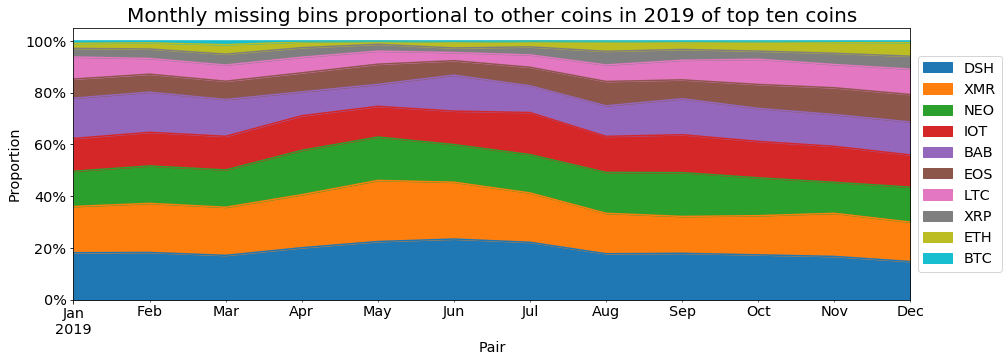

In [106]:
ax = pair_missing_bins_df.plot.area(stacked=True)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_title(f"Monthly missing bins proportional to other coins in 2019 of top ten coins")
ax.set_xlabel("Pair")
ax.set_ylabel("Proportion")
# plt.savefig("../results/missing_bins_monthly.png")

## Proportion missing bins per coins

In [52]:
total_missing_bins_df = (
    daily_missing_bins_df
    .groupby("pair")
    .sum()
    / total_bins
).reset_index()
total_missing_bins_df["pair"] = total_missing_bins_df["pair"].map(lambda x: x.replace('usd', '').upper())

In [53]:
total_missing_bins_df.head()

,pair,daily_missing_bins
0,BAB,0.523222
1,BTC,0.024597
2,DSH,0.756653
3,EOS,0.342244
4,ETH,0.132525


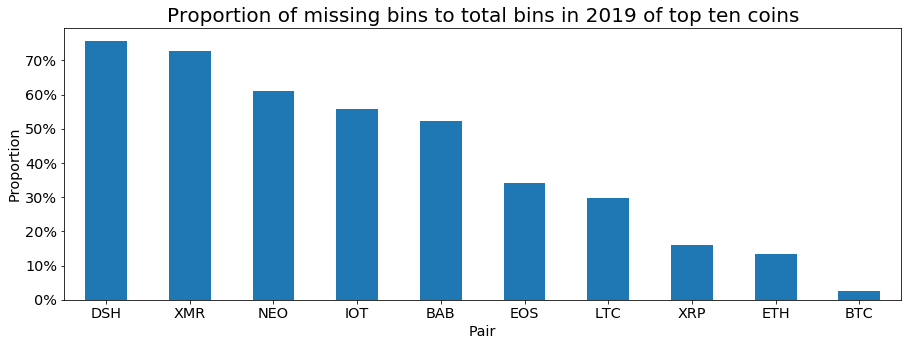

In [107]:
ax = (
    total_missing_bins_df
    .sort_values(by="daily_missing_bins", ascending=False)
    .plot(kind="bar", x="pair", y="daily_missing_bins")
)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_title(f"Proportion of missing bins to total bins in 2019 of top ten coins")
ax.set_xlabel("Pair")
ax.set_ylabel("Proportion")
ax.get_legend().remove()
ax.tick_params(axis='x', labelrotation=0)
# plt.savefig("../results/missing_bins_total.png")

In [ ]:
# fig = px.line(daily_missing_bins_df[ daily_missing_bins_df["time"] > "2017-12-31" ] ,
#               x="time", y="daily_missing_bins", color="pair",
#               title="Daily missing 1min-Bins for Top 10 Coins for 2018-19")
# # add total minutes for a day as dotted line
# fig.add_shape(
#     type="line", line_color="red", # line_width=3, opacity=1,
#     line_width=3,
#     line_dash="dot",
#     x0=0, x1=1, 
#     xref="paper", 
#     y0=24*60, y1=24*60, 
#     yref="y"
# )
# # Add range slider
# fig.update_layout(
#     xaxis=dict(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label="1m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=6,
#                      label="6m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=1,
#                      label="1y",
#                      step="year",
#                      stepmode="backward"),
#                 dict(step="all")
#             ])
#         ),
#         rangeslider=dict(
#             visible=True
#         ),
#         type="date"
#     )
# )
# fig.show()

In [ ]:
# pio.write_html(fig, file='exploration/1min/daily_missing_1min_bins.html')

# Investigate returns below transaction cost

## Enrich data set with lagged returns and scaled volumes

In [3]:
ohlc_df = pd.read_csv(
    "../data/1min/top10_merged.csv.gz",
    sep=',',
    parse_dates=["time"],
    infer_datetime_format=True,
    compression='gzip',
)

KeyboardInterrupt: 

In [4]:
ohlc_df.head()

,time,open,close,high,low,volume,middle_median,pair
0,2013-04-01 02:07:00,93.25,93.30,93.30,93.25,93.300000,93.275,btcusd
1,2013-04-01 02:08:00,100.00,100.00,100.00,100.00,93.300000,100.000,btcusd
2,2013-04-01 02:09:00,93.30,93.30,93.30,93.30,33.676862,93.300,btcusd
3,2013-04-01 02:10:00,93.30,93.30,93.30,93.30,0.000000,93.300,btcusd
4,2013-04-01 02:11:00,93.35,93.47,93.47,93.35,20.000000,93.410,btcusd


In [11]:
ohlc_df = ohlc_df[ (ohlc_df["time"] > "2019") & (ohlc_df["time"] < "2020") ]
ohlc_df.head()

,time,open,close,high,low,volume,middle_median,pair
3025314,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd
3025315,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd
3025316,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd
3025317,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd
3025318,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd


In [12]:
ohlc_df.tail()

,time,open,close,high,low,volume,middle_median,pair
19439608,2019-12-31 23:55:00,41.242,41.242,41.242,41.242,0.000,41.2420,dshusd
19439609,2019-12-31 23:56:00,41.241,41.318,41.318,41.241,30.015,41.2795,dshusd
19439610,2019-12-31 23:57:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd
19439611,2019-12-31 23:58:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd
19439612,2019-12-31 23:59:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd


In [5]:
# train_test_df = pd.read_csv(
#     f"../data/1min/top10_2019_train_test.csv.gz",
#     sep=',',
#     parse_dates=["time"],
# #     index_col=['time', 'pair'],
#     infer_datetime_format=True,
#     compression='gzip',
# )
# train_test_df.head()

In [19]:
top10_1min_df["volume_scaled"].describe()

count    5.255990e+06
mean     2.849637e-01
std      3.262356e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.341341e-01
75%      5.543442e-01
max      1.000000e+00
Name: volume_scaled, dtype: float64

In [7]:
deltas = (
    [ 5, 10 ]
  + [ x * 20 for x in range(1, 7) ] 
  + [ 120+ 120 * x for x in range(1, 12) ]
  + [ 1440 + 240 * x for x in range(1, 3) ]
)    
print( [ f"{x}min" for x in deltas ] ) 

['5min', '10min', '20min', '40min', '60min', '80min', '100min', '120min', '240min', '360min', '480min', '600min', '720min', '840min', '960min', '1080min', '1200min', '1320min', '1440min', '1680min', '1920min']


In [46]:
ohlc_df["volume_scaled"] = ohlc_df["volume"]
for pair in TOP_10_CAPITALIZATION:
    print(pair)
    pair_volume_training = (
        ohlc_df
        [ (ohlc_df["pair"] == pair)  & (ohlc_df["volume"] != 0) & (ohlc_df["time"] < "2019-11") ]
        [["volume"]]
    )
    quantile_transformer = QuantileTransformer()
    quantile_transformer.fit([ [x] for x in pair_volume_training["volume"].values ])
    scalers[pair] = quantile_transformer
    transformed_data = quantile_transformer.transform([ [x] for x in ohlc_df[ (ohlc_df["pair"] == pair) ]["volume"].values ])
    transformed_data = [ x[0] for x in transformed_data ]
    ohlc_df.loc[ (ohlc_df["pair"] == pair),  "volume_scaled"] = transformed_data

btcusd
ethusd
eosusd
ltcusd
xrpusd
babusd
xmrusd
neousd
iotusd
dshusd


In [37]:
ohlc_df.head(10)

,time,open,close,high,low,volume,middle_median,pair,volume_scaled
3025314,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.150522
3025315,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.972667
3025316,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.855625
3025317,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.944132
3025318,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.420208
3025319,2019-01-01 00:06:00,3833.021248,3833.200000,3833.200000,3831.800000,0.893568,3833.110624,btcusd,0.428382
3025320,2019-01-01 00:07:00,3833.200000,3836.400000,3836.500000,3833.200000,0.638637,3834.800000,btcusd,0.378240
3025321,2019-01-01 00:08:00,3836.400000,3836.400000,3836.400000,3836.400000,0.212000,3836.400000,btcusd,0.226972
3025322,2019-01-01 00:09:00,3836.400000,3832.600000,3839.000000,3832.549072,11.099338,3834.500000,btcusd,0.852948
3025323,2019-01-01 00:10:00,3832.549072,3834.200000,3834.700000,3832.549072,14.066196,3833.374536,btcusd,0.880522


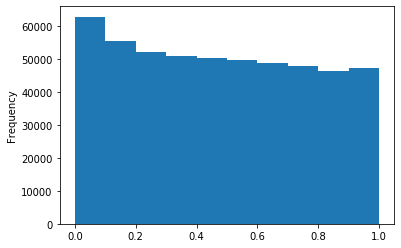

In [41]:
ohlc_df[(ohlc_df["pair"] == "btcusd") & (ohlc_df["volume_scaled"] > 0) ]["volume_scaled"].plot(kind="hist")

In [38]:
ohlc_df.tail(10)

,time,open,close,high,low,volume,middle_median,pair,volume_scaled
19439603,2019-12-31 23:50:00,41.201,41.201,41.201,41.201,0.000,41.2010,dshusd,0.000000
19439604,2019-12-31 23:51:00,41.201,41.201,41.201,41.201,0.000,41.2010,dshusd,0.000000
19439605,2019-12-31 23:52:00,41.201,41.201,41.201,41.201,0.000,41.2010,dshusd,0.000000
19439606,2019-12-31 23:53:00,41.201,41.201,41.201,41.201,0.000,41.2010,dshusd,0.000000
19439607,2019-12-31 23:54:00,41.242,41.242,41.242,41.242,5.000,41.2420,dshusd,0.576577
19439608,2019-12-31 23:55:00,41.242,41.242,41.242,41.242,0.000,41.2420,dshusd,0.000000
19439609,2019-12-31 23:56:00,41.241,41.318,41.318,41.241,30.015,41.2795,dshusd,0.887412
19439610,2019-12-31 23:57:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd,0.000000
19439611,2019-12-31 23:58:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd,0.000000
19439612,2019-12-31 23:59:00,41.241,41.318,41.318,41.241,0.000,41.2795,dshusd,0.000000


In [59]:
[1] + deltas

[1,
 5,
 10,
 20,
 40,
 60,
 80,
 100,
 120,
 240,
 360,
 480,
 600,
 720,
 840,
 960,
 1080,
 1200,
 1320,
 1440,
 1680,
 1920]

In [56]:
# top10_1min_df[f"middle_return_1min"] = top10_1min_df["middle_median"].groupby(['pair']).pct_change(periods=1)
for delta in ([1] + deltas):
    print(delta)
    ohlc_df[f"middle_return_{ int(delta) }min"] = (
        (ohlc_df.groupby(['pair'])["middle_median"].shift(periods=0) - ohlc_df.groupby(['pair'])["middle_median"].shift(periods=delta) ) 
        / ohlc_df.groupby(['pair'])["middle_median"].shift(periods=delta)
    )
    ohlc_df[f"volume_scaled_{ int(delta) }min"] = ohlc_df.groupby(['pair'])["volume_scaled"].shift(periods=delta)

1
5
10
20
40
60
80
100
120
240
360
480
600
720
840
960
1080
1200
1320
1440
1680
1920


In [58]:
# top10_1min_df[top10_1min_df.index.get_level_values("pair") == "ethusd"].head(10)
ohlc_df.head(10)

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,middle_return_1440min,volume_scaled_1440min,middle_return_1680min,volume_scaled_1680min,middle_return_1920min,volume_scaled_1920min,future_middle_return_120min,future_middle_return_240min,middle_return_1min,volume_scaled_1min
3025314,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.153225,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002121,-0.002138,NaN,NaN
3025315,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.971958,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001275,-0.002525,0.000314,0.153225
3025316,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.854724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000300,-0.003353,0.000453,0.971958
3025317,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.942818,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000188,-0.003943,0.000922,0.854724
3025318,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.424673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000375,-0.003577,0.000501,0.942818
3025319,2019-01-01 00:06:00,3833.021248,3833.200000,3833.200000,3831.800000,0.893568,3833.110624,btcusd,0.432755,0.001758,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000326,-0.004045,-0.000433,0.424673
3025320,2019-01-01 00:07:00,3833.200000,3836.400000,3836.500000,3833.200000,0.638637,3834.800000,btcusd,0.383397,0.001886,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001230,-0.004382,0.000441,0.432755
3025321,2019-01-01 00:08:00,3836.400000,3836.400000,3836.400000,3836.400000,0.212000,3836.400000,btcusd,0.231023,0.001850,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000496,-0.003799,0.000417,0.383397
3025322,2019-01-01 00:09:00,3836.400000,3832.600000,3839.000000,3832.549072,11.099338,3834.500000,btcusd,0.851797,0.000430,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000424,-0.003515,-0.000495,0.231023
3025323,2019-01-01 00:10:00,3832.549072,3834.200000,3834.700000,3832.549072,14.066196,3833.374536,btcusd,0.879840,-0.000364,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000613,-0.003704,-0.000294,0.851797


In [15]:
# (
#     top10_1min_df
#     [ (top10_1min_df.index.get_level_values("time") > "2019-01-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]
#     .to_csv(
#         "../data/1min/top10_2019_train_test.csv.gz",
#          sep=",",
#          chunksize=1000000,
#          compression='gzip',
#     )
# )    

In [25]:
def get_3state_price_movement(row, return_column, transaction_cost=0.003, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    
    if abs(price_return) - transaction_cost > 0:
        if cross_sectional_median_column:
            if price_return > max(row[cross_sectional_median_column], 0):
                return 1
            elif price_return < min(row[cross_sectional_median_column], 0):
                return -1
            else:
                return 0
        else:
            if price_return > 0:
                return 1
            else:
                return -1
    else:
        return 0

def get_2state_up_movement(row, return_column, transaction_cost=0.003, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    if cross_sectional_median_column:
        if price_return > row[cross_sectional_median_column] and price_return - transaction_cost > 0:
            return 1
        else:
            return -1
    else:
        if price_return - transaction_cost > 0:
            return 1
        else:
            return -1
        
def get_2state_down_movement(row, return_column, transaction_cost=0.003, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    if cross_sectional_median_column:
        if price_return < row[cross_sectional_median_column] and -price_return - transaction_cost > 0:
            return -1
        else:
            return 1
    else:
        if -x[ return_column ] - transaction_cost > 0:
            return -1
        else:
            return 1           

In [60]:
for delta in [120, 240]:
    ohlc_df[f"future_middle_return_{delta}min"] = ( 
        ( ohlc_df.groupby(['pair'])["middle_median"].shift(-(delta + 1)) - ohlc_df.groupby(['pair'])["middle_median"].shift(-1) ) 
        / ohlc_df.groupby(['pair'])["middle_median"].shift(-1)
    )
#     top10_1min_df[f"future_2state_movement_{delta}min"] = top10_1min_df[f"future_middle_return_{delta}min"].apply(get_2state_price_movement)
#     top10_1min_df[f"future_3state_movement_{delta}min"] = top10_1min_df[f"future_middle_return_{delta}min"].apply(get_3state_price_movement)

In [61]:
ohlc_df.head(10)

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,middle_return_1440min,volume_scaled_1440min,middle_return_1680min,volume_scaled_1680min,middle_return_1920min,volume_scaled_1920min,future_middle_return_120min,future_middle_return_240min,middle_return_1min,volume_scaled_1min
3025314,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.153225,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002121,-0.002138,NaN,NaN
3025315,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.971958,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001275,-0.002525,0.000314,0.153225
3025316,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.854724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000300,-0.003353,0.000453,0.971958
3025317,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.942818,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000188,-0.003943,0.000922,0.854724
3025318,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.424673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000375,-0.003577,0.000501,0.942818
3025319,2019-01-01 00:06:00,3833.021248,3833.200000,3833.200000,3831.800000,0.893568,3833.110624,btcusd,0.432755,0.001758,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000326,-0.004045,-0.000433,0.424673
3025320,2019-01-01 00:07:00,3833.200000,3836.400000,3836.500000,3833.200000,0.638637,3834.800000,btcusd,0.383397,0.001886,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001230,-0.004382,0.000441,0.432755
3025321,2019-01-01 00:08:00,3836.400000,3836.400000,3836.400000,3836.400000,0.212000,3836.400000,btcusd,0.231023,0.001850,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000496,-0.003799,0.000417,0.383397
3025322,2019-01-01 00:09:00,3836.400000,3832.600000,3839.000000,3832.549072,11.099338,3834.500000,btcusd,0.851797,0.000430,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000424,-0.003515,-0.000495,0.231023
3025323,2019-01-01 00:10:00,3832.549072,3834.200000,3834.700000,3832.549072,14.066196,3833.374536,btcusd,0.879840,-0.000364,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000613,-0.003704,-0.000294,0.851797


In [71]:
# # save to gzip-csv
# (
#     ohlc_df
#     .to_csv(
#         "../data/1min/top10_2019_train_test.csv.gz",
#         sep=",",
#         chunksize=1000000,
#         compression='gzip',
#         index=False,
#     )
# )

## Add future realized return unter constraint

In [3]:
ohlc_df = pd.read_csv(
    f"../data/1min/top10_2019_train_test.csv.gz",
    sep=',',
    parse_dates=["time"],
#     index_col=['time', 'pair'],
    infer_datetime_format=True,
    compression='gzip',
)

In [5]:
ohlc_df.columns

Index(['time', 'open', 'close', 'high', 'low', 'volume', 'middle_median',
       'pair', 'volume_scaled', 'middle_return_5min', 'volume_scaled_5min',
       'middle_return_10min', 'volume_scaled_10min', 'middle_return_20min',
       'volume_scaled_20min', 'middle_return_40min', 'volume_scaled_40min',
       'middle_return_60min', 'volume_scaled_60min', 'middle_return_80min',
       'volume_scaled_80min', 'middle_return_100min', 'volume_scaled_100min',
       'middle_return_120min', 'volume_scaled_120min', 'middle_return_240min',
       'volume_scaled_240min', 'middle_return_360min', 'volume_scaled_360min',
       'middle_return_480min', 'volume_scaled_480min', 'middle_return_600min',
       'volume_scaled_600min', 'middle_return_720min', 'volume_scaled_720min',
       'middle_return_840min', 'volume_scaled_840min', 'middle_return_960min',
       'volume_scaled_960min', 'middle_return_1080min',
       'volume_scaled_1080min', 'middle_return_1200min',
       'volume_scaled_1200min', 'mid

In [6]:
ohlc_df.head()

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,volume_scaled_1440min,middle_return_1680min,volume_scaled_1680min,middle_return_1920min,volume_scaled_1920min,future_middle_return_120min,future_middle_return_240min,middle_return_1min,volume_scaled_1min,future_return_120min_constraint
0,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.153225,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002121,-0.002138,NaN,NaN,0.002121
1,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.971958,NaN,...,NaN,NaN,NaN,NaN,NaN,0.001275,-0.002525,0.000314,0.153225,0.001275
2,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.854724,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000300,-0.003353,0.000453,0.971958,0.000300
3,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.942818,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.000188,-0.003943,0.000922,0.854724,-0.000188
4,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.424673,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000375,-0.003577,0.000501,0.942818,0.000375


In [ ]:
print(TOP_10_CAPITALIZATION)

In [7]:
pairs = ohlc_df["pair"].unique()
return_list = []
# for delta in [120]:
for delta in [240]:    
    ohlc_df[f"future_return_{delta}min_constraint"] = np.NaN
    for pair in pairs:    
        print("Delta:", delta, "| Pair:", pair)
        # take only row from one pair
        pair_df = ohlc_df[ ohlc_df["pair"] == pair ]
        
        max_row_num = pair_df.shape[0]
        
        # loop through rows
        for row_num, _ in enumerate(pair_df.iterrows()):
            # check if look forward would yield data, else add NaN to list
            if row_num + delta + 1 < max_row_num:
                # take next row
                _row_num = row_num + 1
                row_1d = pair_df.iloc[ _row_num ]
                # take row in delta bins ahead
                _row_num += delta
                row_future = pair_df.iloc[ _row_num ]

                future_return = np.NaN
                # loop until one reaches bin with any volume for the respective pair
                while _row_num + 1 < max_row_num and np.isnan(future_return):
                    volume = row_future["volume"]
                    # if not volume go to next bin
                    if not volume:
                        _row_num += 1
                        row_future = pair_df.iloc[ _row_num ]
                    else:
                        # save return
                        future_return = (row_future["middle_median"] - row_1d["middle_median"]) / row_1d["middle_median"]
                return_list.append( future_return )
            else:
                return_list.append( np.NaN )
    # save returns in new column
    ohlc_df[f"future_return_{delta}min_constraint"] = return_list

Delta: 240 | Pair: btcusd
Delta: 240 | Pair: ethusd
Delta: 240 | Pair: eosusd
Delta: 240 | Pair: ltcusd
Delta: 240 | Pair: xrpusd
Delta: 240 | Pair: babusd
Delta: 240 | Pair: xmrusd
Delta: 240 | Pair: neousd
Delta: 240 | Pair: iotusd
Delta: 240 | Pair: dshusd


In [34]:
ohlc_df.shape

(5255990, 57)

In [16]:
ohlc_df[ohlc_df["pair"] == "btcusd"].tail(244)

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,middle_return_1680min,volume_scaled_1680min,middle_return_1920min,volume_scaled_1920min,future_middle_return_120min,future_middle_return_240min,middle_return_1min,volume_scaled_1min,future_return_120min_constraint,future_return_240min_constraint
525355,2019-12-31 19:56:00,7170.7,7174.5,7174.5,7170.7,0.322990,7172.60,btcusd,0.285780,0.000028,...,-0.021335,0.143073,-0.021387,0.238238,0.000830,0.006386,0.000319,0.050633,0.000830,0.006386
525356,2019-12-31 19:57:00,7171.8,7172.6,7173.0,7171.8,0.040000,7172.20,btcusd,0.080080,0.000014,...,-0.021388,0.056279,-0.021446,0.529733,0.000892,0.006231,-0.000056,0.285780,0.000892,0.006231
525357,2019-12-31 19:58:00,7172.6,7174.0,7174.0,7172.5,1.138222,7173.30,btcusd,0.478144,0.000188,...,-0.021151,0.738776,-0.021525,0.542324,0.000941,0.006071,0.000153,0.080080,0.000941,NaN
525358,2019-12-31 19:59:00,7174.0,7173.9,7174.0,7173.9,0.158034,7173.95,btcusd,0.197873,0.000356,...,-0.020681,0.690407,-0.021663,0.390784,0.000934,NaN,0.000091,0.478144,0.000934,NaN
525359,2019-12-31 20:00:00,7174.0,7173.9,7174.0,7173.9,0.038649,7173.95,btcusd,0.078000,0.000507,...,-0.020220,0.725917,-0.021423,0.670596,0.001068,NaN,0.000000,0.197873,0.001068,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2019-12-31 23:55:00,7218.0,7218.0,7218.0,7217.2,0.105000,7218.00,btcusd,0.155185,0.000770,...,-0.007444,0.025964,-0.015145,0.528148,NaN,NaN,0.000004,0.190253,NaN,NaN
525595,2019-12-31 23:56:00,7217.9,7218.0,7218.0,7217.9,0.031874,7217.95,btcusd,0.068176,0.000763,...,-0.007460,0.169001,-0.015147,0.143073,NaN,NaN,-0.000007,0.155185,NaN,NaN
525596,2019-12-31 23:57:00,7218.0,7218.0,7218.0,7217.9,0.070378,7218.00,btcusd,0.121639,0.000742,...,-0.007448,0.151898,-0.015139,0.056279,NaN,NaN,0.000007,0.068176,NaN,NaN
525597,2019-12-31 23:58:00,7218.0,7218.0,7218.0,7218.0,0.360000,7218.00,btcusd,0.299935,0.000346,...,-0.007439,0.251330,-0.015051,0.738776,NaN,NaN,0.000000,0.121639,NaN,NaN


In [13]:
future_returns_df = ( 
    ohlc_df
    .groupby( ["time", "pair"] )
    [["future_return_120min_constraint", "future_return_240min_constraint"]]
    .first()
    .unstack() 
)

In [33]:
future_returns_df.shape

(525599, 22)

In [14]:
future_returns_df.head()

future_return_120min_constraint                      \
pair                                         babusd    btcusd    dshusd   
time                                                                      
2019-01-01 00:01:00                        0.014117  0.002121  0.004560   
2019-01-01 00:02:00                        0.014085  0.001275  0.002124   
2019-01-01 00:03:00                        0.012737  0.000300  0.002124   
2019-01-01 00:04:00                        0.012409 -0.000188 -0.002592   
2019-01-01 00:05:00                        0.010477  0.000375 -0.003780   

                                                                       \
pair                   eosusd    ethusd    iotusd    ltcusd    neousd   
time                                                                    
2019-01-01 00:01:00 -0.006375 -0.000587 -0.000111  0.006318  0.008312   
2019-01-01 00:02:00 -0.008983 -0.002634  0.001904  0.005087  0.006566   
2019-01-01 00:03:00 -0.005316 -0.003045  0.000944  0.004371  0.004634   
2019-01-01 00:04:00 -0.003753 -0.003397 -0.001592  0.004598  0.004848   
2019-01-01 00:05:00 -0.001925 -0.001720 -0.001592  0.003899  0.004219   

                                        future_return_240min_constraint  \
pair                   xmrusd    xrpusd                          babusd   
time                                                                      
2019-01-01 00:01:00 -0.001041  0.000388                        0.030766   
2019-01-01 00:02:00 -0.002487 -0.002598                        0.030733   
2019-01-01 00:03:00 -0.002487 -0.002915                        0.029979   
2019-01-01 00:04:00 -0.005235 -0.002748                        0.029645   
2019-01-01 00:05:00 -0.005573 -0.002279                        0.028651   

                                                                       \
pair                   btcusd    dshusd    eosusd    ethusd    iotusd   
time                                                                    
2019-01-01 00:01:00 -0.002138 -0.004273 -0.003464 -0.007075 -0.008463   
2019-01-01 00:02:00 -0.002525 -0.004803 -0.003521 -0.008816 -0.008463   
2019-01-01 00:03:00 -0.003353 -0.004803 -0.002342 -0.009294 -0.009908   
2019-01-01 00:04:00 -0.003943 -0.009270 -0.004648 -0.008986 -0.011917   
2019-01-01 00:05:00 -0.003577 -0.009288 -0.004269 -0.007538 -0.012305   

                                                             
pair                   ltcusd    neousd    xmrusd    xrpusd  
time                                                         
2019-01-01 00:01:00 -0.000761  0.003270 -0.005601 -0.005952  
2019-01-01 00:02:00 -0.001345  0.003329 -0.005675 -0.007491  
2019-01-01 00:03:00 -0.003367  0.001409 -0.010829 -0.007957  
2019-01-01 00:04:00 -0.003141  0.000884 -0.013555 -0.008560  
2019-01-01 00:05:00 -0.003867  0.000884 -0.013889 -0.007998

In [ ]:
future_returns_df["cross_sectional_median_120min"] = future_returns_df["future_return_120min_constraint"].median(axis=1)
future_returns_df["cross_sectional_median_240min"] = future_returns_df["future_return_240min_constraint"].median(axis=1)

In [ ]:
future_returns_df = future_returns_df[["cross_sectional_median_120min", "cross_sectional_median_240min"]].reset_index()

In [ ]:
future_returns_df.columns = future_returns_df.columns.droplevel(1)

In [68]:
future_returns_df.head()

,time,cross_sectional_median_120min,cross_sectional_median_240min
0,2019-01-01 00:01:00,0.001254,-0.003868
1,2019-01-01 00:02:00,0.001589,-0.004162
2,2019-01-01 00:03:00,0.000622,-0.004085
3,2019-01-01 00:04:00,-0.002092,-0.006604
4,2019-01-01 00:05:00,-0.001656,-0.005903


In [69]:
print(ohlc_df.shape)
ohlc_df = pd.merge(
    ohlc_df, 
    future_returns_df[["time","cross_sectional_median_120min", "cross_sectional_median_240min"]], 
    on="time", 
    how="left" )
print(ohlc_df.shape)

(5255990, 61)
(5255990, 63)


In [70]:
ohlc_df.columns

Index(['time', 'open', 'close', 'high', 'low', 'volume', 'middle_median',
       'pair', 'volume_scaled', 'middle_return_5min', 'volume_scaled_5min',
       'middle_return_10min', 'volume_scaled_10min', 'middle_return_20min',
       'volume_scaled_20min', 'middle_return_40min', 'volume_scaled_40min',
       'middle_return_60min', 'volume_scaled_60min', 'middle_return_80min',
       'volume_scaled_80min', 'middle_return_100min', 'volume_scaled_100min',
       'middle_return_120min', 'volume_scaled_120min', 'middle_return_240min',
       'volume_scaled_240min', 'middle_return_360min', 'volume_scaled_360min',
       'middle_return_480min', 'volume_scaled_480min', 'middle_return_600min',
       'volume_scaled_600min', 'middle_return_720min', 'volume_scaled_720min',
       'middle_return_840min', 'volume_scaled_840min', 'middle_return_960min',
       'volume_scaled_960min', 'middle_return_1080min',
       'volume_scaled_1080min', 'middle_return_1200min',
       'volume_scaled_1200min', 'mid

In [71]:
transaction_cost = 0.0015

for delta in [120, 240]:
    ohlc_df[f"future_net_return_{delta}min_long_15bps"] = ( 1 + ohlc_df[f"future_return_{delta}min_constraint"] ) * (1 - transaction_cost) / (1 + transaction_cost) - 1
    ohlc_df[f"future_net_return_{delta}min_short_15bps"] = ( 1 + ohlc_df[f"future_return_{delta}min_constraint"] ) ** -1 * (1 - transaction_cost) / (1 + transaction_cost) - 1
    
    ohlc_df[f"cross_sectional_median_{delta}min_long_15bps"] = ( 1 + ohlc_df[f"cross_sectional_median_{delta}min"] ) * (1 - transaction_cost) / (1 + transaction_cost) - 1
    ohlc_df[f"cross_sectional_median_{delta}min_short_15bps"] = ( 1 + ohlc_df[f"cross_sectional_median_{delta}min"] ) ** -1 * (1 - transaction_cost) / (1 + transaction_cost) - 1
    
    
# ohlc_df["future_net_return_240min_long_15bps"] = ( 1 + ohlc_df["future_return_240min_constraint"] ) * (1 - transaction_cost) / (1 + transaction_cost) - 1
# ohlc_df["future_net_return_240min_short_15bps"] = ( 1 + ohlc_df["future_return_240min_constraint"] ) ** -1 * (1 - transaction_cost) / (1 + transaction_cost) - 1

In [72]:
ohlc_df.head()

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,future_net_return_120min_long_15bps,future_net_return_120min_short_15bps,future_net_return_240min_long_15bps,future_net_return_240min_short_15bps,cross_sectional_median_120min,cross_sectional_median_240min,cross_sectional_median_120min_long_15bps,cross_sectional_median_120min_short_15bps,cross_sectional_median_240min_long_15bps,cross_sectional_median_240min_short_15bps
0,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.153225,NaN,...,-0.000881,-0.005106,-0.005127,-0.000860,0.001254,-0.003868,-0.001745,-0.004244,-0.006852,0.000876
1,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.971958,NaN,...,-0.001724,-0.004265,-0.005513,-0.000472,0.001589,-0.004162,-0.001411,-0.004578,-0.007145,0.001172
2,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.854724,NaN,...,-0.002696,-0.003295,-0.006338,0.000358,0.000622,-0.004085,-0.002376,-0.003615,-0.007069,0.001094
3,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.942818,NaN,...,-0.003183,-0.002808,-0.006926,0.000951,-0.002092,-0.006604,-0.005081,-0.000905,-0.009580,0.003633
4,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.424673,NaN,...,-0.002622,-0.003369,-0.006562,0.000583,-0.001656,-0.005903,-0.004646,-0.001342,-0.008881,0.002925


In [73]:
ohlc_df.columns

Index(['time', 'open', 'close', 'high', 'low', 'volume', 'middle_median',
       'pair', 'volume_scaled', 'middle_return_5min', 'volume_scaled_5min',
       'middle_return_10min', 'volume_scaled_10min', 'middle_return_20min',
       'volume_scaled_20min', 'middle_return_40min', 'volume_scaled_40min',
       'middle_return_60min', 'volume_scaled_60min', 'middle_return_80min',
       'volume_scaled_80min', 'middle_return_100min', 'volume_scaled_100min',
       'middle_return_120min', 'volume_scaled_120min', 'middle_return_240min',
       'volume_scaled_240min', 'middle_return_360min', 'volume_scaled_360min',
       'middle_return_480min', 'volume_scaled_480min', 'middle_return_600min',
       'volume_scaled_600min', 'middle_return_720min', 'volume_scaled_720min',
       'middle_return_840min', 'volume_scaled_840min', 'middle_return_960min',
       'volume_scaled_960min', 'middle_return_1080min',
       'volume_scaled_1080min', 'middle_return_1200min',
       'volume_scaled_1200min', 'mid

In [42]:
# ohlc_df = ohlc_df.iloc[:, :-2]

In [76]:
def get_3state_movement(row, gross_return_column, delta, cost_bps=15):
    gross_return = row[ gross_return_column ]
    
    if pd.isnull(gross_return):
        return gross_return
    
    if gross_return > 0:
        net_return = row[ f"future_net_return_{delta}min_long_{cost_bps}bps" ]
        if net_return > 0:
            return 1
        else:
            return 0
    else:
        net_return = row[ f"future_net_return_{delta}min_short_{cost_bps}bps" ]
        if net_return > 0:
            return -1
        else:
            return 0
        

def get_2state_up_movement(row, return_column, transaction_cost=0.003, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    if cross_sectional_median_column:
        if price_return > row[cross_sectional_median_column] and price_return - transaction_cost > 0:
            return 1
        else:
            return 0
    else:
        if price_return - transaction_cost > 0:
            return 1
        else:
            return 0
        
def get_2state_movement(row, return_column, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    else:
        if cross_sectional_median_column:
            if price_return > row[cross_sectional_median_column]:
                return 1
            else:
                return -1
        else:
            if price_return > 0:
                return 1
            else:
                return -1
        
def get_2state_down_movement(row, return_column, transaction_cost=0.003, cross_sectional_median_column=""):
    price_return = row[ return_column ]
    if pd.isnull(price_return):
        return price_return
    if cross_sectional_median_column:
        if price_return < row[cross_sectional_median_column] and -price_return - transaction_cost > 0:
            return -1
        else:
            return 0
    else:
        if -price_return - transaction_cost > 0:
            return -1
        else:
            return 0           

In [77]:
for delta in [120, 240]:
    ohlc_df[f"future_2state_movement_{delta}min"] = ohlc_df.apply(
        get_2state_movement,
        return_column=f"future_return_{delta}min_constraint", 
        cross_sectional_median_column=f"cross_sectional_median_{delta}min", 
        axis=1
    )
    ohlc_df[f"future_3state_movement_{delta}min"] = ohlc_df.apply(
        get_3state_movement,
        gross_return_column=f"future_return_{delta}min_constraint", 
        delta=delta,
        axis=1,
    )    

In [78]:
ohlc_df.head()

,time,open,close,high,low,volume,middle_median,pair,volume_scaled,middle_return_5min,...,cross_sectional_median_120min,cross_sectional_median_240min,cross_sectional_median_120min_long_15bps,cross_sectional_median_120min_short_15bps,cross_sectional_median_240min_long_15bps,cross_sectional_median_240min_short_15bps,future_2state_movement_120min,future_3state_movement_120min,future_2state_movement_240min,future_3state_movement_240min
0,2019-01-01 00:01:00,3826.364006,3826.400000,3826.600000,3826.364006,0.102581,3826.382003,btcusd,0.153225,NaN,...,0.001254,-0.003868,-0.001745,-0.004244,-0.006852,0.000876,1.0,0.0,1.0,0.0
1,2019-01-01 00:02:00,3826.364006,3828.800000,3828.800000,3822.400000,54.793413,3827.582003,btcusd,0.971958,NaN,...,0.001589,-0.004162,-0.001411,-0.004578,-0.007145,0.001172,-1.0,0.0,1.0,0.0
2,2019-01-01 00:03:00,3828.735078,3829.900000,3830.000000,3828.735078,11.337502,3829.317539,btcusd,0.854724,NaN,...,0.000622,-0.004085,-0.002376,-0.003615,-0.007069,0.001094,-1.0,0.0,1.0,-1.0
3,2019-01-01 00:04:00,3829.000000,3836.700000,3838.386149,3829.000000,29.953928,3832.850000,btcusd,0.942818,NaN,...,-0.002092,-0.006604,-0.005081,-0.000905,-0.009580,0.003633,1.0,0.0,1.0,-1.0
4,2019-01-01 00:05:00,3836.700000,3832.838858,3836.700000,3832.838858,0.846042,3834.769429,btcusd,0.424673,NaN,...,-0.001656,-0.005903,-0.004646,-0.001342,-0.008881,0.002925,1.0,0.0,1.0,-1.0


In [87]:
top10_1min_original_df[ top10_1min_original_df["volume_scaled"].shift(-1) != 0 ]["future_3state_movement_120min_30bps"].value_counts(normalize=True)

 0.0    0.522300
 1.0    0.240113
-1.0    0.237587
Name: future_3state_movement_120min_30bps, dtype: float64

In [88]:
top10_1min_original_df[ top10_1min_original_df["volume_scaled"].shift(-1) != 0 ]["future_2state_up_movement_120min_30bps"].value_counts(normalize=True)

0.0    0.759887
1.0    0.240113
Name: future_2state_up_movement_120min_30bps, dtype: float64

In [89]:
top10_1min_original_df[ top10_1min_original_df["volume_scaled"].shift(-1) != 0 ]["future_2state_down_movement_120min_30bps"].value_counts(normalize=True)

 0.0    0.762413
-1.0    0.237587
Name: future_2state_down_movement_120min_30bps, dtype: float64

In [90]:
top10_1min_original_df[ top10_1min_original_df["volume_scaled"].shift(-1) != 0 ]["future_2state_movement_120min"].value_counts(normalize=True)

 1.0    0.501762
-1.0    0.498238
Name: future_2state_movement_120min, dtype: float64

In [79]:
# save to gzip-csv
(
    ohlc_df
    .to_csv(
        "../data/1min/top10_2019_train_test_new.csv.gz",
         sep=",",
         chunksize=1000000,
         compression='gzip',
    )  
)

## Investigate movements

In [ ]:
movement_2state = (
    top10_1min_df
    [ [x for x in top10_1min_df.columns if "2state" in x ] ]
    [ (top10_1min_df.index.get_level_values("time") > "2019-01-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]
    .melt(var_name='intervall', value_name='movement')
)

movement_2state["movement"] = movement_2state["movement"].map({ -1.0: "down", 0: "stable", 1.0: "up"})

movement_2state["count"] = 1

movement_2state = movement_2state.groupby(["intervall", "movement"]).agg(class_count=("count", "count")).reset_index()

In [ ]:
fig = px.bar(movement_2state, x="intervall", y="class_count", color="movement", barmode="group", title="Distribution of movements in 2019 per return-intervall")
fig.show()
pio.write_html(fig, file='exploration/1min/movement_2state_distribution.html')

In [ ]:
movement_2state_only_volume = (
    top10_1min_df
    [ [x for x in top10_1min_df.columns if "2state" in x ] ]
    [ (top10_1min_df["volume_scaled"] != 0) & (top10_1min_df.index.get_level_values("time") > "2019-01-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]
    .melt(var_name='intervall', value_name='movement')
)

movement_2state_only_volume["movement"] = movement_2state_only_volume["movement"].map({ -1.0: "down", 0: "stable", 1.0: "up"})

movement_2state_only_volume["count"] = 1

movement_2state_only_volume = movement_2state_only_volume.groupby(["intervall", "movement"]).agg(class_count=("count", "count")).reset_index()

In [ ]:
fig = px.bar(movement_2state_only_volume, x="intervall", y="class_count", color="movement", barmode="group", title="Distribution of movements in 2019 per return-intervall")
fig.show()
pio.write_html(fig, file='exploration/1min/movement_2state_only_volume_distribution.html')

In [ ]:
movement_3state = (
    top10_1min_df
    [ [x for x in top10_1min_df.columns if "3state" in x ] ]
    [ (top10_1min_df.index.get_level_values("time") > "2019-01-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]
    .melt(var_name='intervall', value_name='movement'))

movement_3state["movement"] = movement_3state["movement"].map({ -1.0: "down", 0: "stable", 1.0: "up"})

movement_3state["count"] = 1

movement_3state = movement_3state.groupby(["intervall", "movement"]).agg(class_count=("count", "count")).reset_index()

In [ ]:
fig = px.bar(
    movement_3state, 
    x="intervall", 
    y="class_count", 
    color="movement", 
    title="Distribution of movements in 2019 per return-intervall"
#     barmode="group"
)
fig.show()
pio.write_html(fig, file='exploration/1min/movement_3state_distribution.html')

In [ ]:
movement_3state_only_volume = (
    top10_1min_df
    [ [x for x in top10_1min_df.columns if "3state" in x ] ]
    [ (top10_1min_df["volume_scaled"] != 0) & (top10_1min_df.index.get_level_values("time") > "2019-01-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]

    .melt(var_name='intervall', value_name='movement')
)

movement_3state_only_volume["movement"] = movement_3state_only_volume["movement"].map({ -1.0: "down", 0: "stable", 1.0: "up"})

movement_3state_only_volume["count"] = 1

movement_3state_only_volume = movement_3state_only_volume.groupby(["intervall", "movement"]).agg(class_count=("count", "count")).reset_index()

fig = px.bar(
    movement_3state_only_volume, 
    x="intervall", 
    y="class_count", 
    color="movement", 
    title="Distribution of movements in 2019 per return-intervall only considering bins with trades"
#     barmode="group"
)
fig.show()
pio.write_html(fig, file='exploration/1min/movement_3state_only_volume_distribution.html')

In [ ]:
# top10_1min_df = pd.read_csv(
#     "../data/1min/top10_merged.csv.gz",
#     sep=',',
#     parse_dates=["time"],
#     index_col=['time', 'pair'],
#     infer_datetime_format=True,
#     compression='gzip',
# )

In [ ]:
# top10_1min_df = top10_1min_df[ (top10_1min_df.index.get_level_values("time") > "2019-11-01") & (top10_1min_df.index.get_level_values("time") < "2020-01-01") ]

In [ ]:
# top10_1min_df.head()